In [140]:
%matplotlib inline
import pandas as pd
from plotnine import *
import numpy as np
import math
import random
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import Grid
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner
from mesa.time import SimultaneousActivation
from mesa.space import MultiGrid

# Step 1

In [25]:
a = 1
b = 3
c = 1
d = 5
r = 5 * 10**-3
s = 4
I = 1
x_R = -8/5
values = [1,1,2]
xs = np.linspace(0, 2000, 200000)

def stuff(u, t):
    dx = u[1] + (-a * u[0]**3 + b * u[0]**2) - u[2] + changeI(t)
    dy = (c - d * u[0]**2) - u[1]
    dz = r*(s*(u[0] - x_R) - u[2])
    return np.array([dx,dy,dz])

def changeI(t):
    if int(t) < 400:
        return 1
    if int(t) >= 400 and int(t) < 800:
        return 2
    if int(t) >= 800 and int(t) < 1200:
        return 1
    if int(t) >= 1200 and int(t) < 1600:
        return 2
    if int(t) > 1600:
        return 1
    return 2

In [26]:
def rk4(func, initial, deltas):
    ys = [initial]
    for i in range(1, len(xs)):
        old = np.array(ys[-1][:])
        dt = xs[i] - xs[i - 1]
        d1 = np.array(func(old, xs[i])) * dt
        d2 = np.array(func(old + 0.5 * d1, xs[i] + 0.5 * dt)) * dt
        d3 = np.array(func(old + 0.5 * d2, xs[i] + 0.5 * dt)) * dt
        d4 = np.array(func(old + d3, xs[i] + dt)) * dt
        better = old + ((d1 + 2 * d2 + 2 * d3 + d4) / 6.0)
        ys.append(better)
    return np.array(ys)

In [27]:
temp = rk4(stuff, values, xs)
df = pd.DataFrame(temp, columns=["x", "y", "z"])
df["time"] = xs
df

,x,y,z,time
0,1.000000,1.000000,2.000000,0.00
1,1.020046,0.949244,2.000422,0.01
2,1.040175,0.896954,2.000848,0.02
3,1.060373,0.843097,2.001278,0.03
4,1.080624,0.787642,2.001712,0.04
...,...,...,...,...
199995,-1.388442,-8.638566,0.821375,1999.96
199996,-1.388442,-8.638569,0.821376,1999.97
199997,-1.388443,-8.638572,0.821378,1999.98
199998,-1.388443,-8.638575,0.821379,1999.99


# Step 2

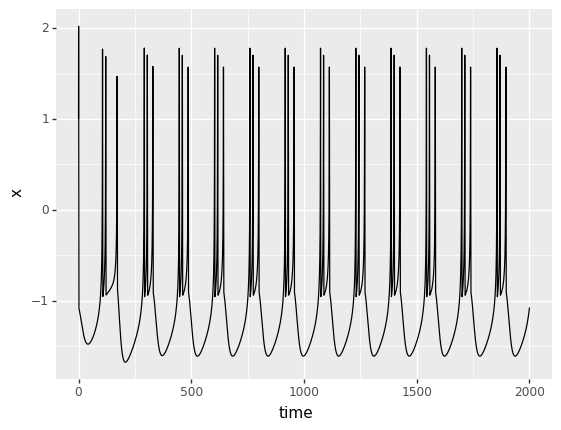

<ggplot: (126689908158)>

In [20]:
ggplot(df, aes(x="time", y="x")) + geom_line()

The graph shown is very similar to that from the wikipedia page, which makes sense because my values and equations are taken from that page and should give a similar graph to what was shown there. It seems as though there is a consistent burst of behavior from the hindmarsh-rose nueron graphed in this, which holds true to how the article describes it as well.

# Step 3

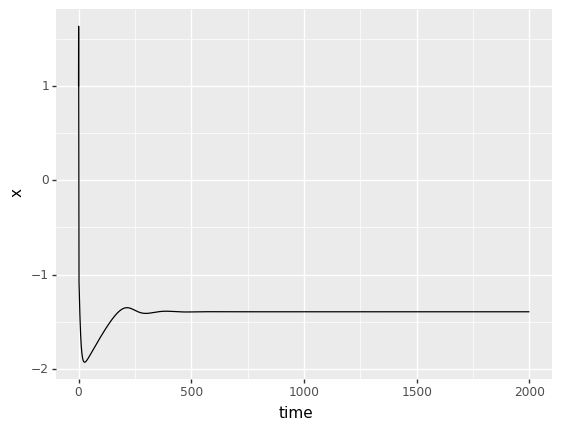

<ggplot: (126687648621)>

In [24]:
ggplot(df, aes(x="time", y="x")) + geom_line()

As opposed to the previous model when I is equal to 1 there is very little variance in the behavior of the hindmarsh-rose neuron as it spikes a little right at the start of the graph and then stays at a consistent x for the entirety of the time plotted.

# Step 4

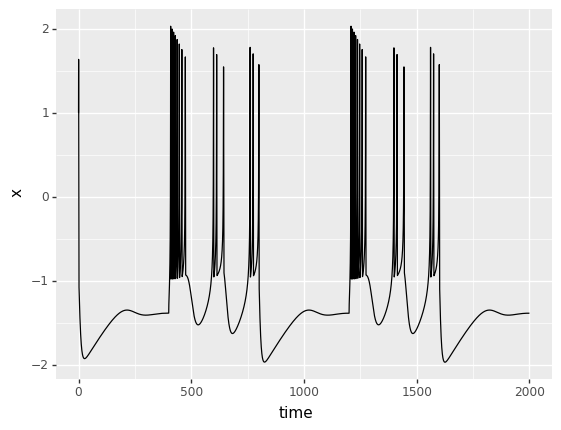

<ggplot: (126691320450)>

In [28]:
ggplot(df, aes(x="time", y="x")) + geom_line()

Given that I is changing every 400 steps this graph makes sense when taking into account the previous graphs, it is essentially crossing the two results together, where you can very clearly see every 400 timesteps the I is changing from extreme bursts of activity, to small consistent activity of the hindmarsh-rose neuron. Every time I is changed so is the fundamental behavior of the neuron being graphed.

# Step 5

In [72]:
dfPoll = pd.read_csv("CSV Files/president_polls.csv")
dfState = pd.read_csv("CSV Files/electoral-college-votes.txt")
dfState

,State,Votes
0,Alabama,9
1,Alaska,3
2,Arizona,11
3,Arkansas,6
4,California,55
5,Colorado,9
6,Connecticut,7
7,District of Columbia,3
8,Delaware,3
9,Florida,29


# Step 6

In [59]:
dfPoll = dfPoll.dropna(subset = ['state'])
dfPoll['created_at'] = pd.to_datetime(dfPoll['created_at'])
dfPoll

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,134912,71969,2020,Pennsylvania,235,Opinion Savvy/InsiderAdvantage,1457,Center for American Greatness,InsiderAdvantage,243.0,...,2020-10-26 13:40:00,NaN,https://amgreatness.com/2020/10/26/trump-takes...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,45.5
1,134912,71969,2020,Pennsylvania,235,Opinion Savvy/InsiderAdvantage,1457,Center for American Greatness,InsiderAdvantage,243.0,...,2020-10-26 13:40:00,NaN,https://amgreatness.com/2020/10/26/trump-takes...,general,6249,Trump,13254,Donald Trump,REP,48.4
2,134912,71969,2020,Pennsylvania,235,Opinion Savvy/InsiderAdvantage,1457,Center for American Greatness,InsiderAdvantage,243.0,...,2020-10-26 13:40:00,NaN,https://amgreatness.com/2020/10/26/trump-takes...,general,6249,Jorgensen,14611,Jo Jorgensen,LIB,3.3
5,134885,71957,2020,Texas,1515,Data for Progress,"1155,1452",Crooked Media | Indivisible,Data for Progress,522.0,...,2020-10-26 11:53:00,NaN,https://filesforprogress.org/memos/2020-senate...,general,6254,Biden,13256,Joseph R. Biden Jr.,DEM,49.0
6,134885,71957,2020,Texas,1515,Data for Progress,"1155,1452",Crooked Media | Indivisible,Data for Progress,522.0,...,2020-10-26 11:53:00,NaN,https://filesforprogress.org/memos/2020-senate...,general,6254,Trump,13254,Donald Trump,REP,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13657,92080,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,2018-12-06 14:43:00,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,44.0
13658,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,2018-12-06 14:45:00,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Sanders,13257,Bernard Sanders,DEM,47.0
13659,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,2018-12-06 14:45:00,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
13660,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,2018-12-06 14:46:00,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0


In [88]:
dfNew = pd.DataFrame()
for i in dfState.index: 
    dfTemp = dfPoll.loc[dfPoll['state'] == dfState['State'][i]]
    dfTemp = dfTemp.loc[dfTemp.first_valid_index()]
    dfTemp['pct'] = dfTemp['pct']/100
    dfNew = dfNew.append(dfTemp)
dfNew = dfNew.reset_index(drop=True)
dfNew

,answer,candidate_id,candidate_name,candidate_party,created_at,cycle,display_name,election_date,end_date,fte_grade,...,seat_name,seat_number,sponsor_candidate,sponsor_ids,sponsors,stage,start_date,state,tracking,url
0,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:27,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/27/20,Alabama,1.0,https://www.tableau.com/data-insights/us-elect...
1,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:28,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/27/20,Alaska,1.0,https://www.tableau.com/data-insights/us-elect...
2,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:27,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/27/20,Arizona,1.0,https://www.tableau.com/data-insights/us-elect...
3,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:27,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/27/20,Arkansas,1.0,https://www.tableau.com/data-insights/us-elect...
4,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:27,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/26/20,California,1.0,https://www.tableau.com/data-insights/us-elect...
5,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:27,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/27/20,Colorado,1.0,https://www.tableau.com/data-insights/us-elect...
6,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:27,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/27/20,Connecticut,1.0,https://www.tableau.com/data-insights/us-elect...
7,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:27,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/26/20,District of Columbia,1.0,https://www.tableau.com/data-insights/us-elect...
8,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:27,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/26/20,Delaware,1.0,https://www.tableau.com/data-insights/us-elect...
9,Biden,13256.0,Joseph R. Biden Jr.,DEM,10/25/20 18:27,2020.0,SurveyMonkey,11/3/20,10/24/20,D-,...,NaN,0.0,NaN,788,Axios,general,9/27/20,Florida,1.0,https://www.tableau.com/data-insights/us-elect...


# Step 7

In [ ]:
for i in dfNew.index: 
    stdv = 1 / (2 * math.sqrt(dfNew['sample_size'][i]))
    rand = np.random.normal(dfNew['pct'][i], stdv)

# Step 8

In [79]:
allVotes = []
trials = 40000
for i in range(trials):
    votes = 0
    for i in dfNew.index: 
        stdv = 1 / (2 * math.sqrt(dfNew['sample_size'][i]))
        rand = np.random.normal(dfNew['pct'][i], stdv)
        if(rand > 0.5):
            votes += dfState[' Votes'][i]
    allVotes.append(votes)

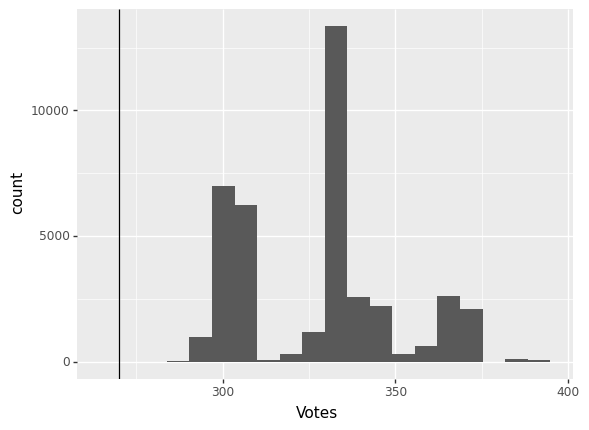

<ggplot: (126691208186)>

In [80]:
dfVotes = pd.DataFrame(allVotes, columns=["Votes"])
ggplot(dfVotes, aes(x="Votes")) \
+ geom_histogram(bins=20) \
+ geom_vline(aes(xintercept=270))

In [85]:
dfVotes.loc[dfVotes['Votes'] > 270]

,Votes
0,345
1,350
2,307
3,307
4,339
...,...
39995,374
39996,301
39997,339
39998,330


From the data I gathered, over 40000 trial runs, Joe Biden wins 100% of the time. This somewhat lines up with what FiveThirtyEight has as they estimate 89 out of 100 wins for Biden. From the data I gathered, Joe Biden doesn't often win with more than 50 electoral college votes. It's highly likely that the discrepancies between mine and their graphs are due to the fact I'm only using a single poll for every state as opposed to the hundreds our thousands needed to make a better estimate about this kind of result, if the day strongly favored Biden for whatever reason, then this graph does as well. However I think much of this Democratic domination comes from the fact that these come from online surveys. We are assuming these surveys get a relative normal amount of both Democrats and Republicans. In general Democrats seem to be more tech intelligent and surround themselves with technology, whereas Rural Republicans may not be inclined to take these surveys or know they exist at all. The fact that they are online somewhat skews the data towards people who are able and inclined to take an online survey in the first place.

# Step 9-10

In [329]:
class FireFly(Agent):
    """
    The ants wander around the world in search of food. Upon finding food,
    they drop a pheremone trail while heading home to store the food. When
    wandering, they either follow the strongest gradient of pheremone, or move randomly.
    """
    def __init__(self, model, pos, uniqueId, moore=True):
        super().__init__(uniqueId, model)
        self.pos = pos
        self.state = "LOOKING"
        self.clock = random.randint(1, 11)
        self.moore = moore

    def step(self):
        if self.clock == 1:
            self._state = "FLASHING"
            self._clock = (self.clock%10) + 1
            
        else:
            self._state = "LOOKING"
            neighbors = self.model.grid.get_neighbors(self.pos, moore=True)
            self._clock = (self.clock%10) + 1
            for neighbor in neighbors:
                if neighbor.state == "FLASHING":
                    self._clock = 2
        
    def random_move(self):
        """
        Step one cell in any allowable direction.
        """
        # Pick the next cell from the adjacent cells.
        next_moves = self.model.grid.get_neighborhood(self.pos, self.moore, True)
        next_move = self.random.choice(next_moves)
        # Now move:
        self.model.grid.move_agent(self, next_move)
        
    def advance(self):
        self.state = self._state
        self.clock = self._clock
        self.random_move()

In [330]:
class FireFlyWorld(Model):
    """
    Represents the ants foraging for food.
    """

    def __init__(self, height=30, width=30):
        """
        Create a new playing area of (height, width) cells.
        """

        super().__init__()
        self.count = 0
        self.dc = DataCollector({"FLASHING": lambda m: self.count_type(m, "FLASHING")})
        
        self.schedule = SimultaneousActivation(self)

        # Use a simple grid, where edges wrap around.
        self.grid = MultiGrid(height, width, torus=True)

        # Add in the ants
        # Need to do this first, or it won't affect the cells, consequence of SimultaneousActivation
        for i in range(200):
            pos = (random.randint(0,self.height-1), random.randint(0,self.width-1))
            firefly = FireFly(self, pos, self.next_id())
            self.grid.place_agent(firefly, pos)
            self.schedule.add(firefly)

        self.running = True

    def step(self):
        """
        Have the scheduler advance each cell by one step
        """
        self.dc.collect(self)
        self.count += 1
        self.schedule.step()

        if self.count == 500:
            self.running = False
            
    @staticmethod
    def count_type(model, tree_condition):
        '''
        Helper method to count trees in a given condition in a given model.
        '''
        count = 0
        for tree in model.schedule.agents:
            if tree.state == tree_condition:
                count += 1
        return count

In [331]:
fireflies = FireFlyWorld()

In [332]:
fireflies.run_model()

In [333]:
results = fireflies.dc.get_model_vars_dataframe()
results

,FLASHING
0,0
1,38
2,61
3,29
4,13
...,...
495,61
496,24
497,6
498,9


# Step 11

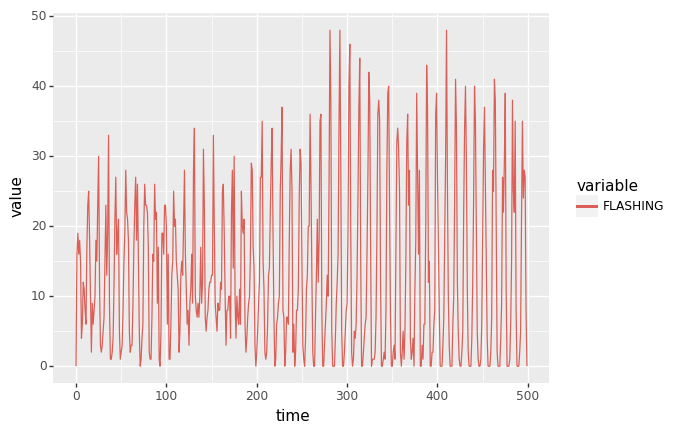

<ggplot: (126685356671)>

In [328]:
results["time"] = np.linspace(0, len(results) - 1, len(results))
resultsmelt = pd.melt(results, id_vars=["time"], value_vars=["FLASHING"])
ggplot(resultsmelt, aes(x="time", y="value", color="variable")) \
+ geom_line()

In general, over 500 timesteps the fireflies do seem to be flashing in unison more as time progresses which would make sense given the agent based model it is a graph of. When fireflies see a flash they try to syncronize with that flash so there should be a good amount of synchronization amongst the flashing of the fireflies even if it is within groups of 30-50 fireflies as opposed to all of the fireflies eventually becoming synced.

# Step 12

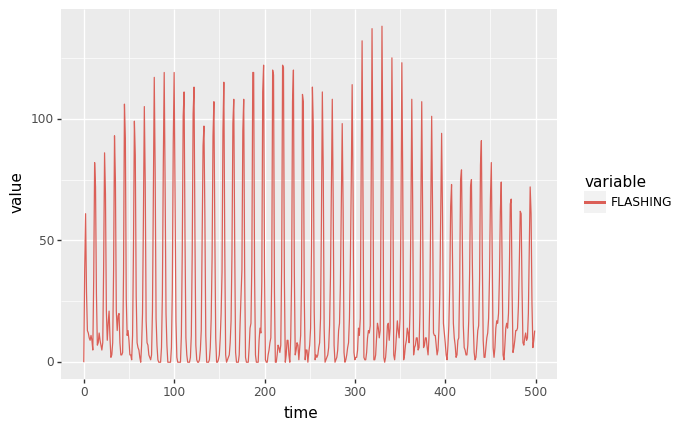

<ggplot: (126687484245)>

In [334]:
results["time"] = np.linspace(0, len(results) - 1, len(results))
resultsmelt = pd.melt(results, id_vars=["time"], value_vars=["FLASHING"])
ggplot(resultsmelt, aes(x="time", y="value", color="variable")) \
+ geom_line()

Somehow changing the amount of time that a firefly is flashing for actually made the fireflies more synced up to eachother despite what I would assume. Perhaps because they are still moving around while they are in the FLASHING state would have to do with this although I'm not sure. This method more than doubled the amount of fireflies in a group that are synchronized at any given time. Instead of causing more dissonance in the clocks for fireflies it ended up making them more synchronized compared to the previous graph where they only flashed for one timestep.